In [1]:
import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
y=pd.read_csv("./Train/train.csv").values

In [3]:
#print(y[:5,:])
#print(y.shape)
print(y[y[:,0]=='296.jpg',1][0])

Pikachu


In [4]:
p = Path("../pokemon_on_goa_trip/Train/Images/")

dirs = p.glob("*")
labels_dict = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}

image_data = []
labels = []

for folder_dir in dirs:
    #print(folder_dir)
    label = str(folder_dir).split("\\")[-1][-7:]
    #print(label)
    img = image.load_img(folder_dir,target_size=(32,32))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(labels_dict[y[y[:,0]==label,1][0]])

/home/utsav/anaconda3/lib/python3.7/site-packages/PIL/Image.py:873: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [5]:
print(len(image_data))
print(len(labels))

304
304


In [6]:
print(labels)

[0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]


In [7]:
image_data = np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)
print(image_data.shape)
print(labels.shape)

(304, 32, 32, 3)
(304,)


# for random data

In [8]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)

# visualize the data

Bulbasaur


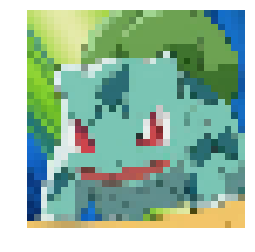

Charmander


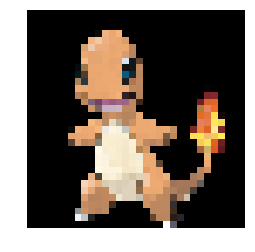

Charmander


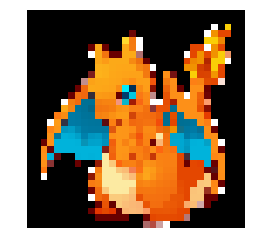

Charmander


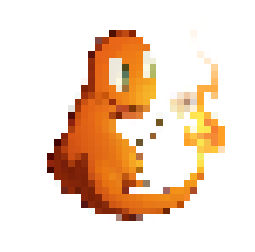

Bulbasaur


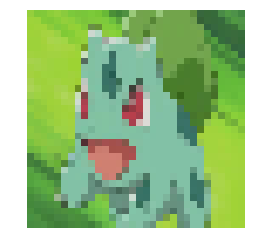

Bulbasaur


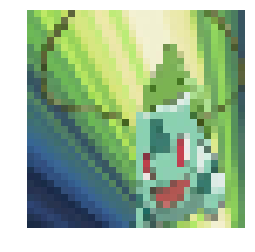

Pikachu


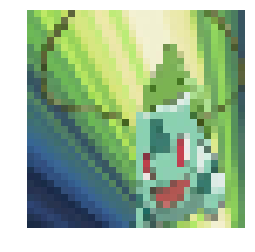

Pikachu


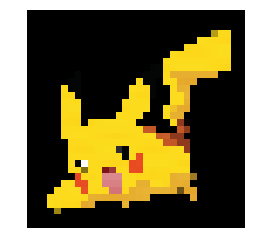

Bulbasaur


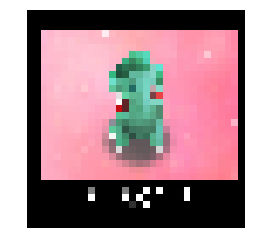

Charmander


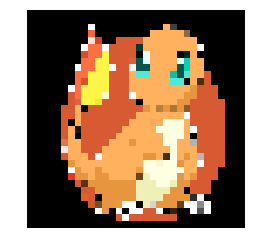

In [9]:
def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 
for i in range(10):
    for key,value in labels_dict.items():
        if value == labels[i]:
            print(key)
    drawImg(image_data[i])

# SVM classifier

In [10]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=500):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

In [11]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(304, 3072)
(304,)


In [12]:
CLASSES = len(np.unique(labels))
print(CLASSES)

3


In [13]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [14]:
data = classWiseData(image_data,labels)
print(data[1].shape)
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])

(101, 3072)
101
101
102


In [15]:
def getDataPairForSVM(d1,d2):
    """Combines Data of two classes into a signle matrix"""
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

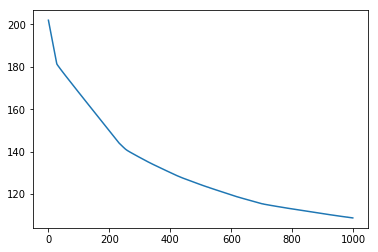

In [16]:
mySVM  = SVM()
xp, yp  = getDataPairForSVM(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)

In [17]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

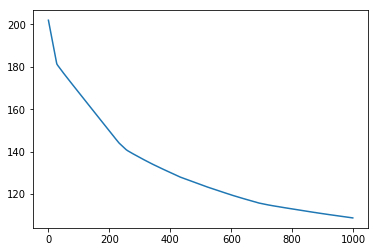

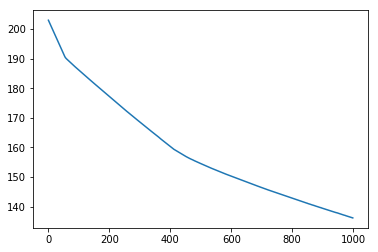

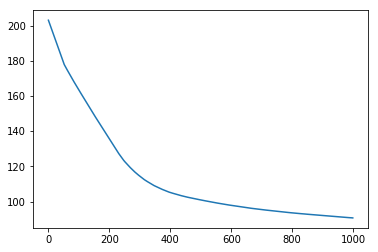

In [18]:
svm_classifiers = trainSVMs(image_data,labels)

# prediction

In [19]:
def binaryPredict(x,w,b):
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [20]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [21]:
print(predict(image_data[0]))
print(labels[0])

1
1


In [22]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [23]:
accuracy(image_data,labels)

0.6282894736842105

# Testing Phase

In [24]:
xtest=pd.read_csv("./Test/test.csv").values
idd=pd.read_csv("./Test/test.csv").values

In [25]:
print(xtest.shape)
print(idd.shape)

(123, 1)
(123, 1)


In [72]:
p = Path("./Test/Images/")

dirs = p.glob("*")
#labels_dict = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}

image_data = []
#labels = []

for folder_dir in dirs:
   
    img = image.load_img(folder_dir,target_size=(32,32))
    img_array = image.img_to_array(img)
    image_data.append(img_array)


In [73]:
print(len(image_data))
#print(image_data)

123


In [74]:
image_data = np.array(image_data,dtype='float32')/255.0
print(image_data.shape)

(123, 32, 32, 3)


In [75]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)

(123, 3072)


In [76]:
#ImageId,NameOfPokemon

In [77]:
m=xtest.shape[0]
result=[]
for i in range(m):
    result.append(predict(image_data[i]))
print(result)

[1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1]


In [78]:
labels_dict = {0:"Pikachu",1:"Bulbasaur",2:"Charmender"}

In [83]:
lab=[]
for i in range(m):
    lab.append(labels_dict[result[i]])
idd=idd.reshape((-1,))
print(idd.shape)
print(type(lab))

(123,)
<class 'list'>


In [84]:
#df[idd[i]]=labels_dict[result[i]]
ans={}

ans["ImageId"]=idd
ans["NameOfPokemon"]=lab
df = pd.DataFrame(ans,columns=["ImageId", "NameOfPokemon"])

In [85]:
print(len(ans))
print(ans)

2
{'ImageId': array(['1106.jpg', '2236.jpg', '1131.jpg', '2221.jpg', '2011.jpg',
       '2030.jpg', '2035.jpg', '1110.jpg', '1104.jpg', '2217.jpg',
       '1111.jpg', '1100.jpg', '1112.jpg', '1138.jpg', '2238.jpg',
       '2009.jpg', '2225.jpg', '2240.jpg', '2020.jpg', '2209.jpg',
       '2029.jpg', '1114.jpg', '2201.jpg', '1118.jpg', '2025.jpg',
       '2202.jpg', '1117.jpg', '1119.jpg', '2000.jpg', '2007.jpg',
       '2039.jpg', '2017.jpg', '2215.jpg', '1120.jpg', '2006.jpg',
       '1116.jpg', '1128.jpg', '1125.jpg', '2203.jpg', '1133.jpg',
       '1137.jpg', '2220.jpg', '2012.jpg', '2224.jpg', '2206.jpg',
       '1122.jpg', '2223.jpg', '1102.jpg', '2234.jpg', '2216.jpg',
       '2016.jpg', '2227.jpg', '2013.jpg', '1113.jpg', '2204.jpg',
       '1101.jpg', '2208.jpg', '2024.jpg', '2031.jpg', '2222.jpg',
       '2211.jpg', '2033.jpg', '2213.jpg', '2231.jpg', '2001.jpg',
       '2040.jpg', '1127.jpg', '2023.jpg', '2015.jpg', '1121.jpg',
       '2232.jpg', '1139.jpg', '1103.jpg', '2018

In [86]:
df.to_csv("./Test/Sample_submission.csv", index=False)